# K-means Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/vkr93/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/blob/main/Unsupervised%20Learning/1_K_means_Clustering/k_means_clustering.ipynb)

**Task**:  To get insights into customer behaviour and preferences by using K-means clustering. The data set used for this included purchasing behaviour. 

CLustering the customers based on their spending using k-means clustering algorithm, and then interpret the resulting clusters to gain insights into the purchasing behavior. 


The [Custemor personality](Dataset/marketing_campaign.csv) is a dataset of customer spending for two years spending data. This analysis helps in reconginizing the company's ideal costumer. This would help busineses understand cosutmers and make them modify the deals and products for specific needs.  



In [3]:
#import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [4]:
#import data
data = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Unsupervised Learning/1_K_means_Clustering/Dataset/marketing_campaign.csv", sep='\t')
data.head

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

In [5]:
#Explore the Data
print(data.head()) #View the first few rows of the data 

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [6]:
#Get information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Get Summmary statistics of the data 
print(data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

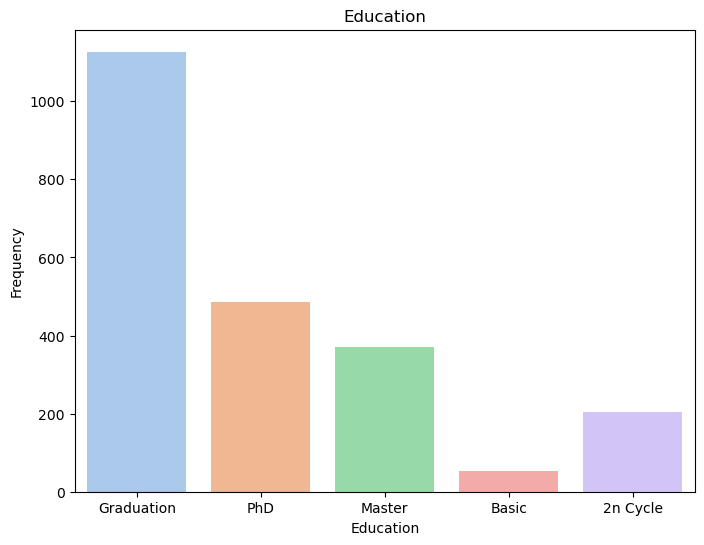

In [9]:
# Visulize the data
plt.figure(figsize=(8, 6))
sns.countplot(x="Education", data=data, palette="pastel")
plt.ylabel("Frequency")
plt.title("Education")
plt.show()

### Interpreting the graph, we see that the majority of customers in our dataset are university graduates (shown by the black bar). We also see that approximately 500 people in our dataset are PhDs and 200 are masters graduates.

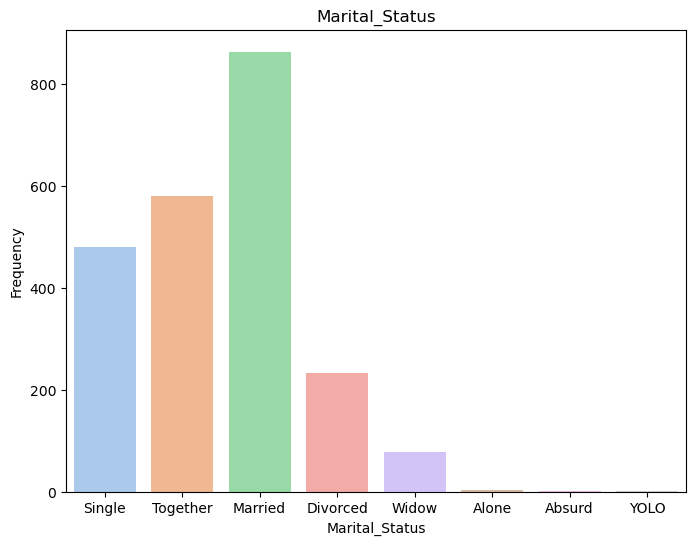

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


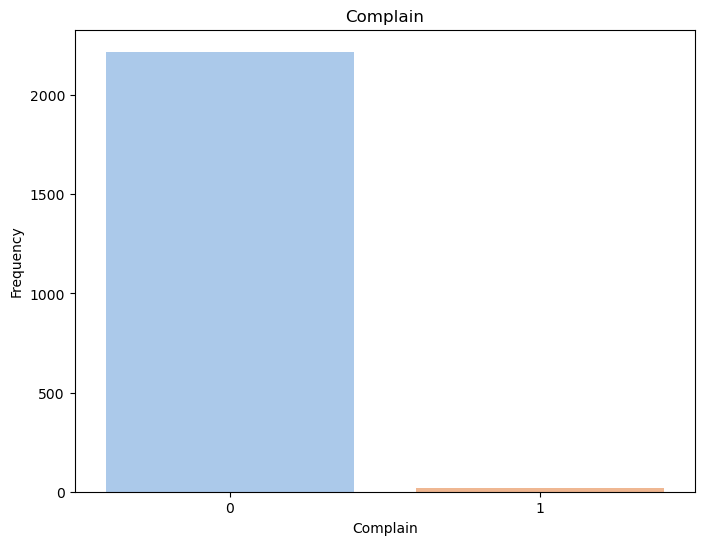

Complain:
Complain
0    2219
1      21
Name: count, dtype: int64


In [10]:
def bar_plot(feature):
    plt.figure(figsize=(8, 6))
    
    sns.countplot(x=feature, data=data, palette="pastel")
    
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.show()
    
    varV = data[feature].value_counts()
    print(f"{feature}:\n{varV}")

categorical_variables = ["Marital_Status", "Complain"]

for variable in categorical_variables:
    bar_plot(variable)

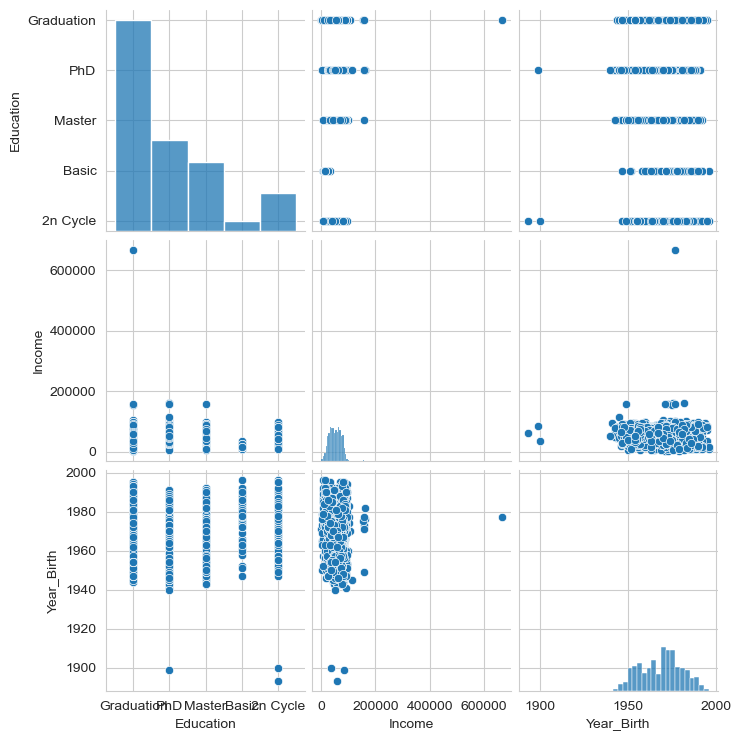

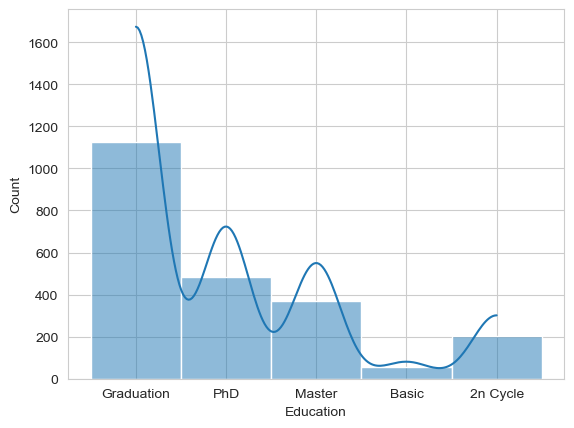

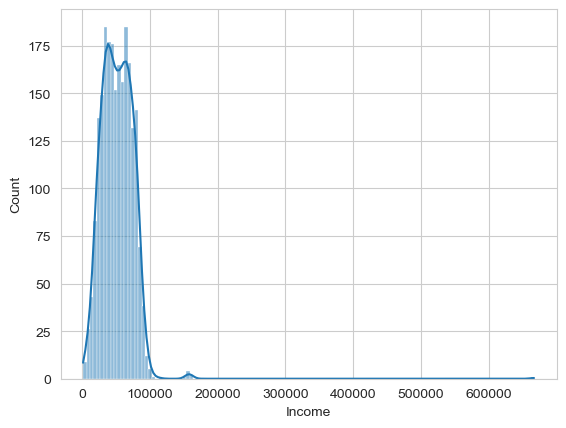

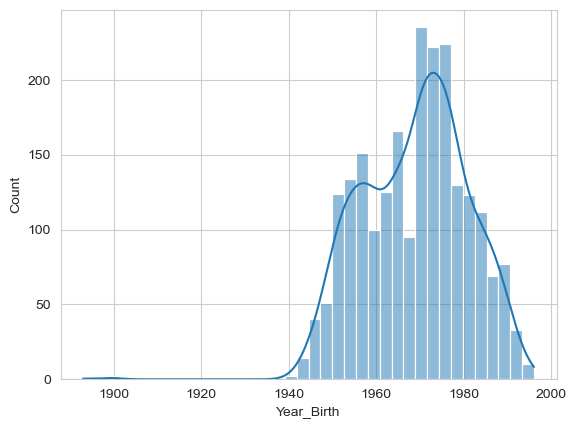

In [11]:
#Visualize the data 
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Education', 'Income', 'Year_Birth'])
plt.show()

sns.histplot(data, x='Education', kde=True)
plt.show()

sns.histplot(data, x='Income', kde=True)
plt.show()

sns.histplot(data, x='Year_Birth', kde=True)
plt.show()


As we can see in the graph above, the vast majority of people in our dataset have annual incomes between 0 and 100,000 USD. A small portion have incomes around 150,000 USD, and a few people have incomes around 700,000 USD. In later sections, we will obtain cleaner, more understandable graphs after removing outliers from our dataset.

But simply looking at this graph, we can draw the following conclusions.

The vast majority of people in our dataset have incomes between 0 and 100,000 USD. The average income of people in our dataset is around 50,000 USD.

**Data Analysis**

In the Simple Data Analysis section, we will use the groupby() function to analyze some variables together to get some information about our data. We will do two examples, which are:

Education -- Income Education -- NumWebPurchases

In [12]:
data[["Education","Income"]].groupby(["Education"], as_index = False).mean().sort_values(by="Income",ascending = False)

,Education,Income
4,PhD,56145.313929
3,Master,52917.534247
2,Graduation,52720.373656
0,2n Cycle,47633.190000
1,Basic,20306.259259


We see that individuals with PhD and Master education levels are the ones who earn the highest average salary at home.

In [13]:
data[["Education","NumWebPurchases"]].groupby(["Education"], as_index = False).mean().sort_values(by = "NumWebPurchases", ascending = False)

,Education,NumWebPurchases
4,PhD,4.423868
2,Graduation,4.125111
3,Master,4.032432
0,2n Cycle,3.729064
1,Basic,1.888889


When we look at the number of times individuals shop on the company's website according to their education levels, we see that PhDs have more online shopping numbers than individuals at other education levels. The number is quite low among high school graduates.

In [14]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

the missing values in terms of percentage.

In [15]:
data.isna().sum() / data.shape[0] * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

The 24 missing values in the Income column correspond to a percentage of 1.07. Since this percentage is low (for example, it is not 50%), we do not need to remove the Income column from our data. We can fill these missing values with the average value of the column.

In fact, it may not be a good idea to fill the empty values in the Income column with the average, because we do not know if the values in the Income column are distributed symmetrically at the moment, because we have not yet found and removed outliers from the data set.

we will fill in the missing data with the average.

In [16]:
data["Income"] = data["Income"].fillna(np.mean(data.Income))

we are removing people over the age of 85 and under the age of 18 from our data set because they are not in our target customer base. In addition, we are removing people with incomes over $400,000 from our data set because they are not within our target customer base.

In [17]:
#Removing individuals with income greater than $400,000:
data = data.drop(data[data.Income > 400000].index)
#Removing individuals born before 1935:
data = data.drop(data[data.Year_Birth < 1935].index)
#Removing individuals born after 2004:
data = data.drop(data[data.Year_Birth > 2004].index)

### Outlier Detection and removal from the data set

In [18]:
from collections import Counter

def detect_outliers(data, features):
    outlier_indices = []
    
    for feature in features:
        # 1st quartile
        Q1 = np.percentile(data[feature], 25)
        # 3rd quartile
        Q3 = np.percentile(data[feature], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outliers and their indices
        outlier_list_col = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices_counter = Counter(outlier_indices)
    multiple_outliers = [index for index, count in outlier_indices_counter.items() if count > 1]
    
    return multiple_outliers

In [19]:
data.loc[detect_outliers(data,["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,1,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,...,2,0,0,1,0,0,0,3,11,0
515,203,1975,Master,Single,81169.0,0,0,14-04-2013,47,1288,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,18-06-2013,10,297,...,6,1,0,0,0,0,0,3,11,1
1042,10749,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0


In [20]:
data = data.drop(detect_outliers(data,["Year_Birth", "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]),axis = 0).reset_index(drop = True)

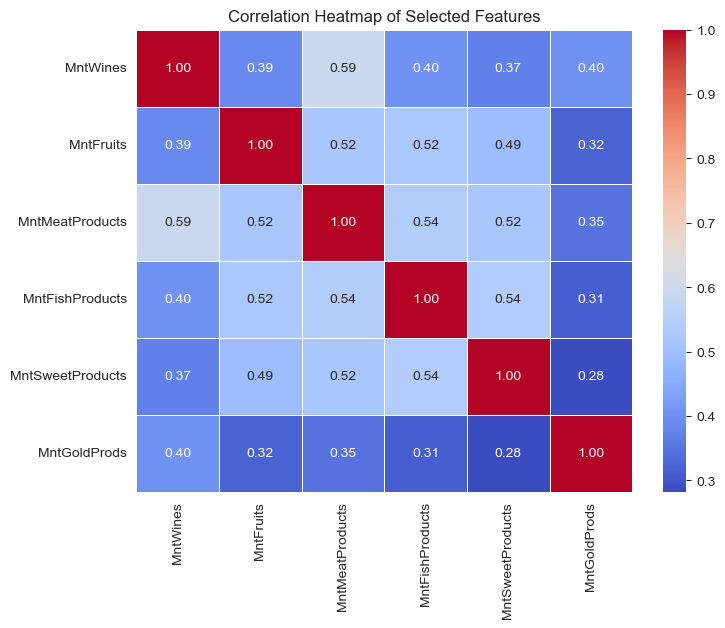

In [21]:
# Generate Correlation Matric
features_list = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
correlation_matrix = data[features_list].corr()

#Plot correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

When we look at the correlation between products that have been spent on in the last 2 years, we see that the strongest positive correlation is between wine and meat products.

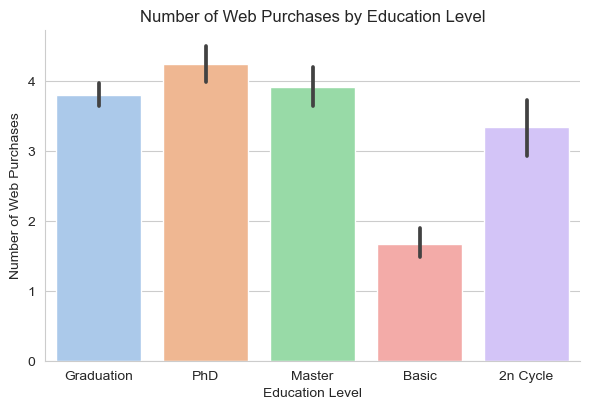

In [22]:
g = sns.catplot(x="Education", y="NumWebPurchases", kind="bar", data=data, height=4, aspect=1.5, palette="pastel")
g.set_ylabels("Number of Web Purchases")
g.set_xlabels("Education Level")
g.set(title="Number of Web Purchases by Education Level")
plt.show()

## Model Building 
K-Means Clustering is an unsupervised machine learning algorithm that is used to find groups in data. It is a simple and easy-to-implement clustering algorithm that can be used to solve a wide range of problems. The algorithm works by iteratively assigning each data point to one of k groups based on the features that are provided. The data points are clustered based on feature similarity.

The optimal number of clusters, k, is a hyperparameter that must be specified before training the model. The value of k is determined using the elbow method.
The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. The method consists of plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

When we look at shopping habits by education level, we see that more educated people tend to shop online more often.

In [23]:
# Check data types for each column
print(data.dtypes)



ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [25]:
import pandas as pd

# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [26]:
# Use one-hot encoding to convert categorical data to numeric
data_encoded = pd.get_dummies(data)

# Now you can fit KMeans without encountering the ValueError
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=400, n_init=20, random_state=0)
kmeans.fit(data_encoded)  # This should work without a ValueError


KMeans(max_iter=400, n_clusters=5, n_init=20, random_state=0)

In [60]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Sample DataFrame with object data containing NaNs
data = pd.DataFrame({
    'Education': ['1.1', '2.2', 'NaN', '4.4'],  # 'NaN' as a string
    'Marital_Status': ['5.5', '6.6', '7.7', 'NaN']
})

# Replace 'NaN' strings with actual NaNs
data = data.replace('NaN', np.nan)

# Impute NaNs with the mean of the column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("Data after imputation:")
print(data_imputed)


Data after imputation:
   Education  Marital_Status
0   1.100000             5.5
1   2.200000             6.6
2   2.566667             7.7
3   4.400000             6.6


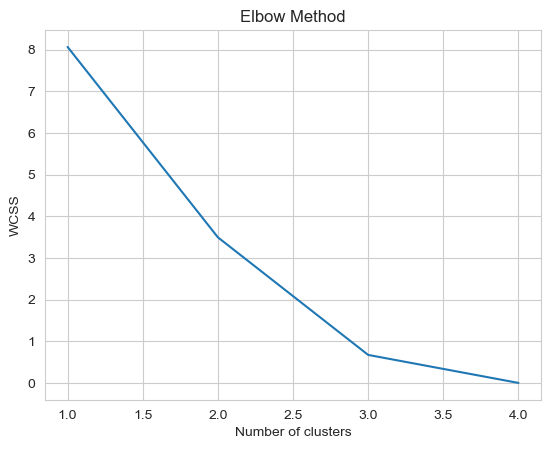

In [64]:
X = data_imputed.iloc[:, :num_columns].values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the elbow graph
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
# Applying k-means to the dataset
kmeans = KMeans(max_iter=10000, n_clusters = 4, n_init =100, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

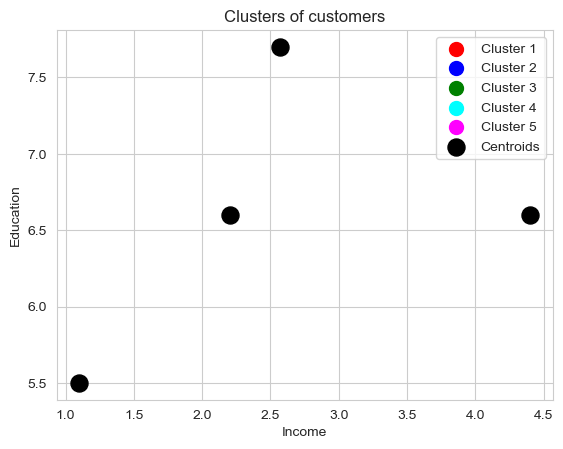

In [79]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Education')
plt.legend()
plt.show()